Autor: Duver Lectamo
Actividad: explorando el IMDB dataset de 50k movie reviews

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
import nltk
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# importando dataset

In [98]:
df = pd.read_csv('IMDB Dataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [99]:
print(df.describe)

<bound method NDFrame.describe of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>


# Recuento de sentimientos

In [100]:
print("Total :\n", df['sentiment'].value_counts())

Total :
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


# Preprocesando las secuencias

In [101]:
review = []
sentences = list(df['review'])
for sen in sentences:
    review.append(sen)

# Creación de etiquetas

In [102]:
labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

# División de dtaso de entrenamiento y prueba

In [103]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20)

# Tokenización y generacion de las secuencias

In [104]:
from math import trunc
vacab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type='post'
oov_tok = "<OOV>"

# Tokenizacion y acolchado de secuencias

In [105]:
tokenizer = Tokenizer(num_words=vacab_size, oov_token=oov_tok)

In [106]:
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences

In [107]:
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

In [108]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences,maxlen=max_length, truncating=trunc_type)

# Generate and pad test sequences

In [109]:
# test_padded = test_padded.reshape(test_padded.shape[0], 10, -1)

# test_padded = test_padded.reshape(test_padded.shape[0], timesteps, 30)
# test_padded = test_padded.reshape(test_padded.shape[0], 1, test_padded.shape[1])
# test_sequences = tokenizer.texts_to_sequences(test_sentences)
# test_padded = pad_sequences(test_sequences,maxlen=max_length, truncating=trunc_type)
# test_sequences = tokenizer.texts_to_sequences(test_sentences)
# test_padded = pad_sequences(test_sequences,maxlen=max_length, truncating=trunc_type)
# test_padded = np.reshape(test_padded, (test_padded.shape[0], timesteps, test_padded.shape[1] // timesteps))


# Construccion del modelo

In [110]:
model = keras.Sequential([
    keras.layers.Embedding(vacab_size, embedding_dim, input_length=max_length),
    # keras.layers.Flatten(),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(6, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# construcción del modelo de entrenamiento

In [111]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# print the model summary

In [112]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_24 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Construcción del modelo de entrenamiento

In [113]:
num_epochs = 10
history = model.fit(padded,
                    train_labels,
                    epochs=num_epochs,
                    validation_data=(test_padded, test_labels),
                    verbose=1)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 131s 102ms/step - accuracy: 0.7081 - loss: 0.5314 - val_accuracy: 0.8412 - val_loss: 0.4035
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 135s 96ms/step - accuracy: 0.8802 - loss: 0.3015 - val_accuracy: 0.8416 - val_loss: 0.3664
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 123s 99ms/step - accuracy: 0.9000 - loss: 0.2572 - val_accuracy: 0.8459 - val_loss: 0.3578
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 99ms/step - accuracy: 0.9106 - loss: 0.2251 - val_accuracy: 0.8459 - val_loss: 0.3775
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 98ms/step - accuracy: 0.9227 - loss: 0.2006 - val_accuracy: 0.8420 - val_loss: 0.3951
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 121s 96ms/step - accuracy: 0.9404 - loss: 0.1605 - val_accuracy: 0.8382 - val_loss: 0.4112
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 97ms/step - accuracy: 0.9538 - loss: 0.1349 - val_accuracy: 0.8369 - val_loss: 0.4870
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 95ms/step - accuracy:

# Graficar el historial de entrenamiento

<Axes: >

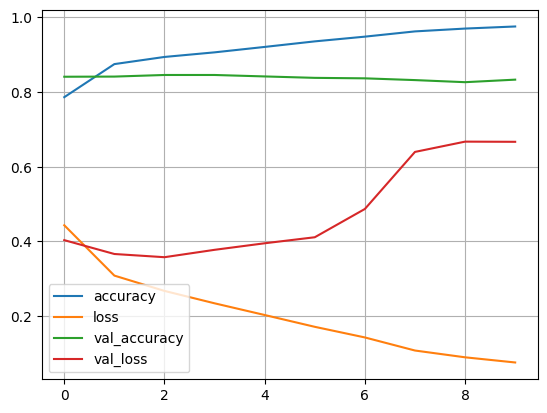

In [114]:
pd.DataFrame(history.history).plot(grid=True)


In [115]:
# Pérdida en el conjunto de entrenamiento
train_loss = history.history['loss']
print(train_loss)

# Precisión en el conjunto de entrenamiento
train_accuracy = history.history['accuracy']
print(train_accuracy)
# Pérdida en el conjunto de validación
val_loss = history.history['val_loss']
print(val_loss)
# Precisión en el conjunto de validación
val_accuracy = history.history['val_accuracy']
print(val_accuracy)

[0.4433479905128479, 0.3084930181503296, 0.26748690009117126, 0.23427189886569977, 0.2029232233762741, 0.1712954044342041, 0.14283350110054016, 0.10780034214258194, 0.08962079137563705, 0.07577617466449738]
[0.7864500284194946, 0.8750500082969666, 0.8942000269889832, 0.9065250158309937, 0.9210500121116638, 0.9359250068664551, 0.9485750198364258, 0.9626500010490417, 0.9702249765396118, 0.9758250117301941]
[0.4034711718559265, 0.36636412143707275, 0.35777756571769714, 0.3775482773780823, 0.3950907289981842, 0.4112117290496826, 0.4869878888130188, 0.6398151516914368, 0.6673589944839478, 0.666892945766449]
[0.8411999940872192, 0.8416000008583069, 0.8458999991416931, 0.8458999991416931, 0.8420000076293945, 0.8381999731063843, 0.836899995803833, 0.8321999907493591, 0.8266000151634216, 0.8334000110626221]


In [116]:
nuevos_textos = ["This movie is great", "I did not like anything"]
nuevas_secuencias = tokenizer.texts_to_sequences(nuevos_textos)
nuevas_secuencias_rellenadas = pad_sequences(nuevas_secuencias, maxlen=max_length, truncating=trunc_type)

In [117]:
predicciones = model.predict(nuevas_secuencias_rellenadas)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


In [118]:
for prediccion in predicciones:
    if prediccion > 0.5:
        print("Sentimiento positivo")
    else:
        print("Sentimiento negativo")

Sentimiento negativo
Sentimiento negativo


# TODO , hacer prediccione sy obtener la matriz de confusion, con las metricas, distribución de los errores, histograma de predicciones menos reales (.predict, confusión_matrix, plt.hist(error))

In [119]:
y_pred = model.predict(test_padded)
y_pred = (y_pred > 0.5).astype(int)  # Convertir probabilidades en predicciones binarias

# Generar confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step


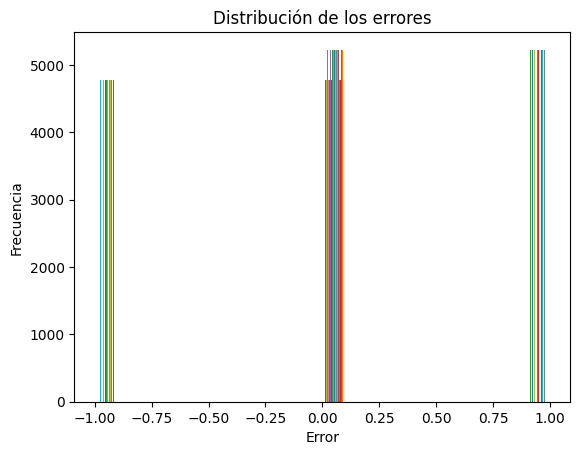

In [120]:
error = y_pred - test_labels
plt.hist(error, bins=20)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución de los errores')
plt.show()

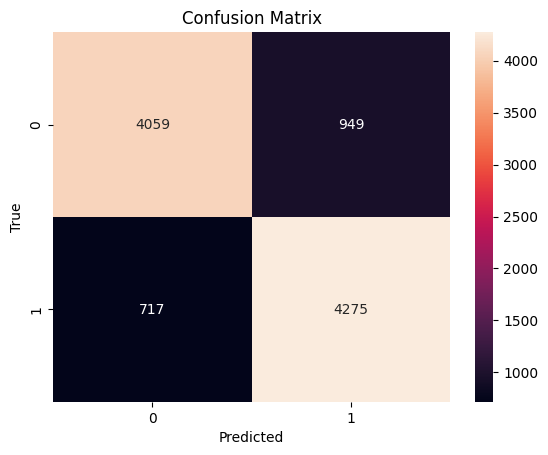

In [121]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

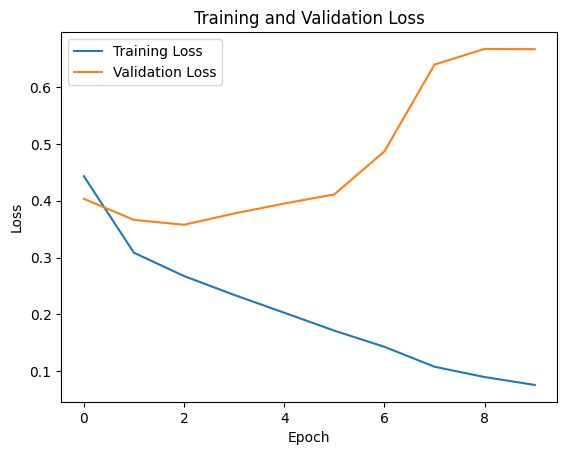

In [122]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()